In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
avo=pd.read_csv("avocado.csv")
avo

,index,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [3]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
index           1517 non-null int64
Date            1517 non-null object
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null int64
region          1517 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


In [4]:
avo['Date']=pd.to_datetime(avo['Date'])
avo['Month']=avo['Date'].apply(lambda x:x.month)
avo['Day']=avo['Date'].apply(lambda x:x.day)

In [5]:
avo.drop('index',axis=1,inplace=True)

In [6]:
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [7]:
avo['type'].value_counts()

conventional    1517
Name: type, dtype: int64

There is only one type of avocado i.e conventional.so we will find average price distribution according to conventional type

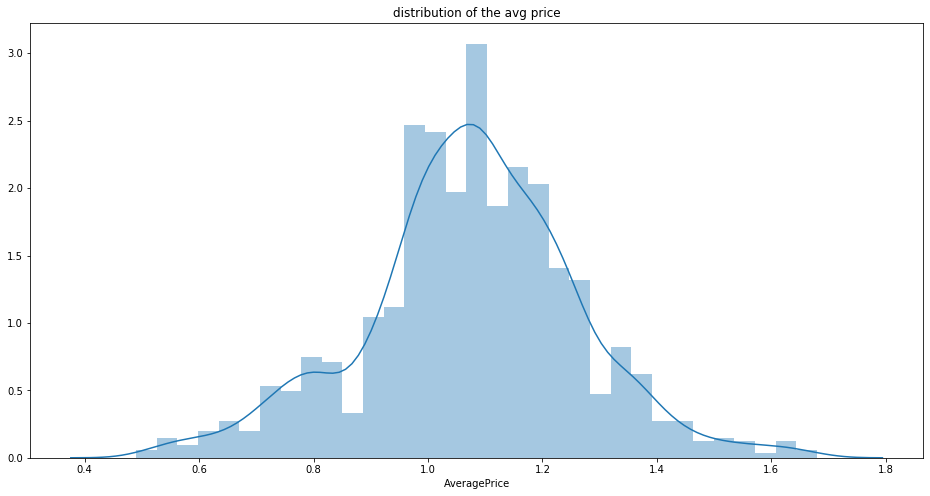

In [8]:
plt.figure(figsize=(16,8))
plt.title("distribution of the avg price")
sns.distplot(avo['AveragePrice'])

<function matplotlib.pyplot.show(*args, **kw)>

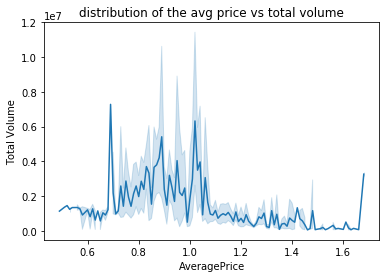

In [9]:
sns.lineplot(x=avo["AveragePrice"],y=avo["Total Volume"],data=avo)
plt.title("distribution of the avg price vs total volume")
plt.show

Text(0.5, 1.0, 'Average Price')

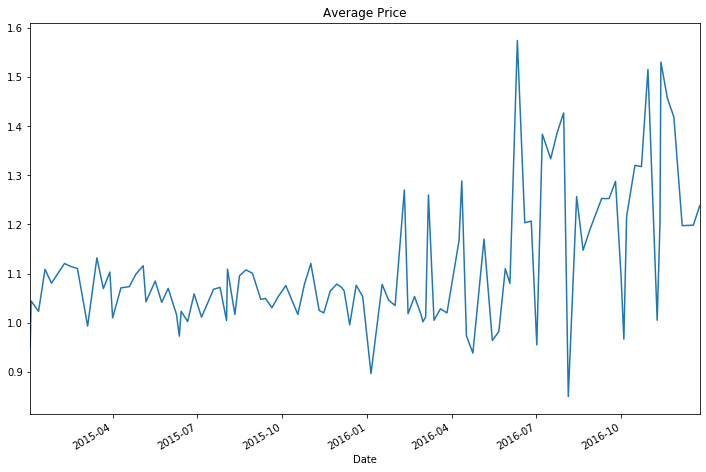

In [10]:
byDate=avo.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

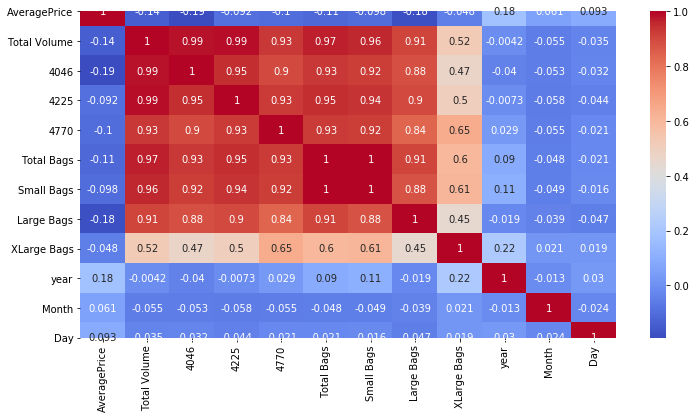

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(avo.corr(),cmap='coolwarm',annot=True)

In [12]:
df=pd.get_dummies(avo.drop(['region','Date'],axis=1),drop_first=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,9,25


In [13]:
df['Total Volume']=(df['Total Volume']-df['Total Volume'].min())/(df['Total Volume'].max()-df['Total Volume'].min())
df['4046']=(df['4046']-df['4046'].min())/(df['4046'].max()-df['4046'].min())
df['4225']=(df['4225']-df['4225'].min())/(df['4225'].max()-df['4225'].min())
df['4770']=(df['4770']-df['4770'].min())/(df['4770'].max()-df['4770'].min())
df['Total Bags']=(df['Total Bags']-df['Total Bags'].min())/(df['Total Bags'].max()-df['Total Bags'].min())
df['Small Bags']=(df['Small Bags']-df['Small Bags'].min())/(df['Small Bags'].max()-df['Small Bags'].min())
df['Large Bags']=(df['Large Bags']-df['Large Bags'].min())/(df['Large Bags'].max()-df['Large Bags'].min())
df['XLarge Bags']=(df['XLarge Bags']-df['XLarge Bags'].min())/(df['XLarge Bags'].max()-df['XLarge Bags'].min())

In [14]:
X=df.drop(['AveragePrice'], axis = 1)
print(X.shape)
y=df['AveragePrice']
print(y.shape)

(1517, 11)
(1517,)


In [15]:
from scipy.stats import zscore

z_score=abs(zscore(df))
print(df.shape)
df=df.loc[(z_score<3).all(axis=1)]
print(df.shape)

(1517, 12)
(1436, 12)


In [16]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,0.000571,0.000030,0.002779,0.000035,0.000800,0.000898,0.000083,0.0,2015,12,27
1,1.35,0.000361,0.000011,0.002261,0.000042,0.000920,0.001035,0.000087,0.0,2015,12,20
2,0.93,0.001781,0.000017,0.005664,0.000094,0.000718,0.000803,0.000092,0.0,2015,12,13
3,1.08,0.000902,0.000035,0.003703,0.000053,0.000371,0.000402,0.000119,0.0,2015,6,12
4,1.28,0.000275,0.000025,0.002219,0.000055,0.000427,0.000454,0.000176,0.0,2015,11,29


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=52)

In [20]:
lr=LinearRegression()
la=Lasso()
en=ElasticNet()
ri=Ridge()
kn=KNeighborsRegressor()
dt=DecisionTreeRegressor(random_state=97)
ab=AdaBoostRegressor(random_state=97)
rf=RandomForestRegressor(random_state=97)
gb=GradientBoostingRegressor(random_state=97)

In [21]:
models=[]
models.append(("LinearRegression",lr))
models.append(("Lasso",la))
models.append(("ElasticNet",en))
models.append(("Ridge",ri))
models.append(("KNeighborsRegressor",kn))
models.append(("DecisionTreeRegressor",dt))
models.append(("AdaBoostRegressor",ab))
models.append(("RandomForestRegressor",rf))
models.append(("GradientBoostingRegressor",gb))

In [22]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
rmse=[]
for m,model in models:
    print('*********************************',m,'*********************************')
    print('\n',model)
    Model.append(m)
    model.fit(X_train,y_train)
    pre=model.predict(X_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    b=np.sqrt(mse)
    print('RMSE= ',b)
    rmse.append(b)
    score= cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')
    
    
    
    

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.21645267868645746
Mean_Squared_Error = 0.028552962018990463
RMSE=  0.16897621731767598
Cross_Val_Score =  -0.4707843009725766


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -0.00010555213966512156
Mean_Squared_Error = 0.0364444814862668
RMSE=  0.1909043778604011
Cross_Val_Score =  -0.2292630304929663


********************************* ElasticNet *********************************

 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic'

I Choose RandomForestRegressor as my final model because it perform very well on our dataset.RMSE value is low
                      
R2_score =  0.7666784964430498

Mean_Squared_Error = 0.008502383771929826

RMSE=  0.09220837148507627

Cross_Val_Score =  -0.19911698862210606


In [23]:
from sklearn.externals import joblib

joblib.dump(rf,'df_joblib')

['df_joblib']